In [1]:
import sys
import requests
import pandas as pd
import datetime as dt
import numpy as np

ModuleNotFoundError: No module named 'velib'

In [71]:
os.getcwd()

'/home/edmz/code/E-Dmz/Scripts/VelibScrap'

In [54]:
URL_VELIB_STATUS = "https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_status.json"
def get_velib_df():
    response = requests.get(URL_VELIB_STATUS)
    velib_df = (pd.DataFrame(response.json()["data"]["stations"])
                    .set_index("stationCode"))
    return velib_df

In [55]:
raw_velib_df = get_velib_df()
raw_velib_df.head(2)

,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported
stationCode,,,,,,,,,,
16107,213688169,2,2,"[{'mechanical': 1}, {'ebike': 1}]",31,31,1,1,1,1634243715
11104,516709288,9,9,"[{'mechanical': 8}, {'ebike': 1}]",10,10,1,1,1,1634243815


In [63]:
velib_df = raw_velib_df.copy()
velib_df.reset_index(inplace = True)
find_mecha = lambda row: row['num_bikes_available_types'][0].get('mechanical', np.nan)
find_elec = lambda row: row['num_bikes_available_types'][1].get('ebike', np.nan)
velib_df['meca'] = velib_df.apply(find_mecha, axis = 1)
velib_df['elec'] = velib_df.apply(find_elec, axis = 1)
velib_df['park'] = velib_df['num_docks_available']
velib_df['datetime'] = dt.datetime.strftime(dt.datetime.now(), '%Y-%m-%d %H%M')
velib_df = velib_df[['datetime', 'stationCode', 'meca', 'elec', 'park']]


In [73]:
#velib_df.iloc[0:0,:].to_csv("test.csv", index = False)

In [64]:
velib_df.to_csv('test.csv', mode='a', header=False, index = False)

In [7]:
df = pd.read_csv('test-15-1.csv')

In [8]:
df.set_index(['datetime', 'stationCode'])

meca  elec  park
datetime        stationCode                  
2021-10-14 2340 16107           0     1    32
                11104           9     1     9
                9020            9     2    10
                12109          23     4     1
                5001            2     0    41
...                           ...   ...   ...
2021-10-14 2359 34012           0     0    26
                26009           0     0     0
                17126          10     4    15
                32012           3     2    31
                34005          12    16     2

[11456 rows x 3 columns]

<AxesSubplot:xlabel='datetime', ylabel='meca'>

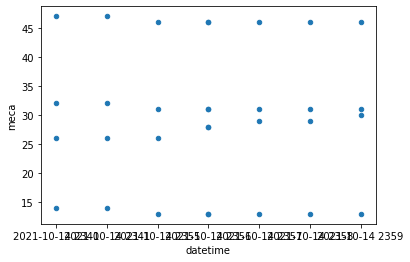

In [16]:
df[df.stationCode.isin([12008, 12009, 12106, 12011,])].plot(x = "datetime", y = "meca", kind = "scatter")